1. Question or problem definition.  (read overview)
2. Get training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

1. Вывести насколько каждый стат Коррелирует с тем что нам нужно (Correlating)
2. Загнать все в более узкие категории и еще раз закоррелировать 
3. Перегнать все слова в числа (Converting)
4. Заменить пропуски (Completing)
5. Разобраться(удалить) семплы которые вызывают ошибки или являются сильными аутлаерами (Correcting)
6. Создать новые фичи (допустим как в титанике Age * Class) (Creating)
7. чарты

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test = pd.read_csv('Data/test.csv')
train = pd.read_csv('Data/train.csv')

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### check all columns to see correlations

class

In [4]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


dealing with names

In [5]:
combine = [train, test]

In [6]:
for i in combine:
    i['Title'] = i['Name'].str.extract('([A-Za-z]+\.)')

In [7]:
train[['Title','Survived']].groupby(['Title'], as_index=False).count().sort_values('Survived', ascending=False)

,Title,Survived
12,Mr.,517
9,Miss.,182
13,Mrs.,125
8,Master.,40
4,Dr.,7
15,Rev.,6
7,Major.,2
1,Col.,2
10,Mlle.,2
11,Mme.,1


In [8]:
for ds in combine:
    for row in ds:
        ds['Title'] = ds['Title'].replace(['Sir.','Countess.','Don.','Jonkheer.','Lady.','Capt.','Ms.','Mme.','Mlle.','Col.','Major.','Rev.','Dr.'], 'rare')

In [9]:
train[['Title','Survived']].groupby(['Title'], as_index=False).count() \
.sort_values('Survived', ascending=False)

,Title,Survived
2,Mr.,517
1,Miss.,182
3,Mrs.,125
0,Master.,40
4,rare,27


In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


Check for uniques

In [11]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,Title
count,891,891,891,204,889,891
unique,891,2,681,147,3,5
top,"Stoytcheff, Mr. Ilia",male,CA. 2343,C23 C25 C27,S,Mr.
freq,1,577,7,4,644,517


In [12]:
print('before:', train.shape, test.shape, combine[0].shape, combine[1].shape)
test = test.drop(['Ticket', 'Cabin'], axis=1)
train = train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)

combine = [train, test]
print('end:   ', train.shape, test.shape, combine[0].shape, combine[1].shape)

before: (891, 13) (418, 12) (891, 13) (418, 12)
end:    (891, 10) (418, 10) (891, 10) (418, 10)


In [13]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,Mr.
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,Mr.
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,Master.
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,Mrs.
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,Mrs.


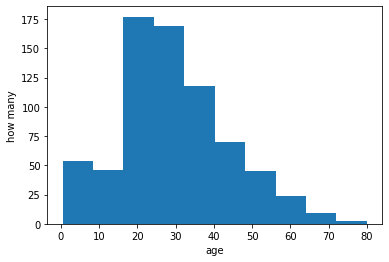

In [14]:
train.Age.plot(kind='hist')
plt.xlabel('age')
plt.ylabel('how many')
plt.show()

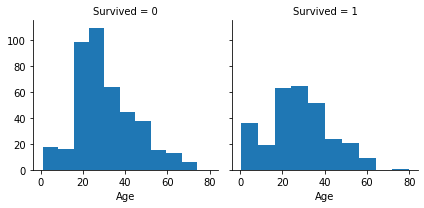

In [15]:
import seaborn as sns
g = sns.FacetGrid(train, col="Survived")
g.map(plt.hist, 'Age')

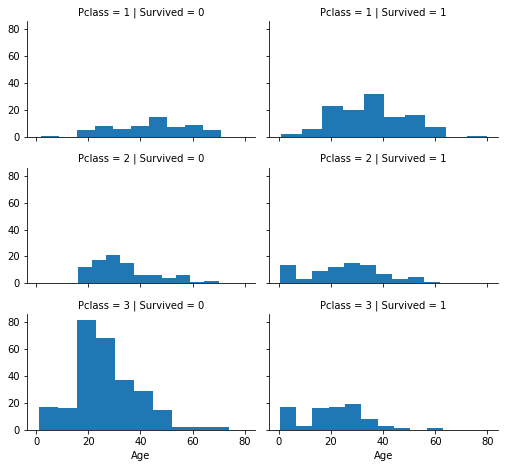

In [16]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age')
grid.add_legend();

words > numbers

In [17]:
train[['Title','Survived']].groupby(['Title'], as_index=False).count() \
.sort_values('Survived', ascending=False)

,Title,Survived
2,Mr.,517
1,Miss.,182
3,Mrs.,125
0,Master.,40
4,rare,27


In [18]:
title_dict = {'Mr.':1, 'Miss.':2, 'Mrs.':3, 'Master.':4, 'rare':5}
for df in combine:
    df['Title'] = df['Title'].map(title_dict)
    df['Title'] = df['Title'].fillna(0)
    df['Title'] = df['Title'].astype(int)

In [19]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [20]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

In [21]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,5
887,1,1,1,19.0,0,0,30.0000,S,2
888,0,3,1,NaN,1,2,23.4500,S,2
889,1,1,0,26.0,0,0,30.0000,C,1


In [22]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [23]:
test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Title           0
dtype: int64

missing Age solving
More accurate way of guessing missing values is to use other correlated features. 
In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

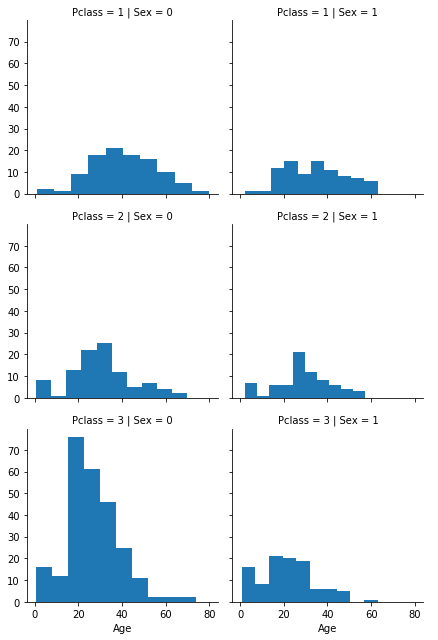

In [24]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex')
grid.map(plt.hist, 'Age')
grid.add_legend()

#### Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.

In [25]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

#### Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.


In [26]:
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = train[(train['Sex'] == i) & \
                              (train['Pclass'] == j+1)]['Age'].dropna()

        age_guess = guess_df.median()

        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

for i in range(0, 2):
    for j in range(0, 3):
        train.loc[ (train.Age.isnull()) & (train.Sex == i) & (train.Pclass == j+1),'Age'] = guess_ages[i,j]

train['Age'] = train['Age'].astype(int)

In [27]:
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = test[(test['Sex'] == i) & \
                              (test['Pclass'] == j+1)]['Age'].dropna()

        age_guess = guess_df.median()

        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

for i in range(0, 2):
    for j in range(0, 3):
        test.loc[ (test.Age.isnull()) & (test.Sex == i) & (test.Pclass == j+1),'Age'] = guess_ages[i,j]

test['Age'] = test['Age'].astype(int)

In [28]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [29]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [30]:
combine = [train, test]

In [31]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [32]:
train[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0,0.550000
1,1,0.337374
2,2,0.412037
3,3,0.434783
4,4,0.090909


In [33]:
train = train.drop(['AgeBand'], axis=1)
combine = [train, test]

In [34]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1
5,0,3,0,1,0,0,8.4583,Q,1
6,0,1,0,3,0,0,51.8625,S,1
7,0,3,0,0,3,1,21.0750,S,4
8,1,3,1,1,0,2,11.1333,S,3
9,1,2,1,0,1,0,30.0708,C,3


In [35]:
for df in combine:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [36]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,0,1,1,0,7.2500,S,1,2
1,1,1,1,2,1,0,71.2833,C,3,2
2,1,3,1,1,0,0,7.9250,S,2,1
3,1,1,1,2,1,0,53.1000,S,3,2
4,0,3,0,2,0,0,8.0500,S,1,1


In [37]:
train = train.drop(['SibSp','Parch'], axis=1)
test = test.drop(['SibSp','Parch'], axis=1)
combine = [train, test]

In [38]:
combine[0].head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,7.2500,S,1,2
1,1,1,1,2,71.2833,C,3,2
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,2
4,0,3,0,2,8.0500,S,1,1


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    int32  
 4   Fare        891 non-null    float64
 5   Embarked    889 non-null    object 
 6   Title       891 non-null    int32  
 7   FamilySize  891 non-null    int64  
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 48.9+ KB


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int32  
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    object 
 6   Title        418 non-null    int32  
 7   FamilySize   418 non-null    int64  
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 23.0+ KB


In [41]:
train['Embarked'].isna().sum()

2

In [42]:
train.Embarked.isna().sum()

2

In [43]:
print(train['Embarked'].mode())
print('_'*20)
print(train['Embarked'].mode()[0])

0    S
dtype: object
____________________
S


In [44]:
freq = train['Embarked'].mode()[0]
for ds in combine:
    ds['Embarked'] = ds['Embarked'].fillna(freq)

In [45]:
train.Embarked.isna().sum()

0

In [46]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [47]:
for ds in combine:
    ds['Embarked'] = ds['Embarked'].map({'C':0, 'Q':1, 'S':2})
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,7.2500,2,1,2
1,1,1,1,2,71.2833,0,3,2
2,1,3,1,1,7.9250,2,2,1
3,1,1,1,2,53.1000,2,3,2
4,0,3,0,2,8.0500,2,1,1


In [48]:
test['Fare'].isna().sum()

1

In [49]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,2,7.8292,1,1,1
1,893,3,1,2,7.0000,2,3,2
2,894,2,0,3,9.6875,1,1,1
3,895,3,0,1,8.6625,2,1,1
4,896,3,1,1,12.2875,2,3,3


In [50]:
train['FareCat'] = pd.qcut(train['Fare'], 5)
test['FareCat'] = pd.qcut(train['Fare'], 5)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,FareCat
0,0,3,0,1,7.2500,2,1,2,"(-0.001, 7.854]"
1,1,1,1,2,71.2833,0,3,2,"(39.688, 512.329]"
2,1,3,1,1,7.9250,2,2,1,"(7.854, 10.5]"
3,1,1,1,2,53.1000,2,3,2,"(39.688, 512.329]"
4,0,3,0,2,8.0500,2,1,1,"(7.854, 10.5]"


In [51]:
train[['FareCat', 'Survived']].groupby(['FareCat'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FareCat,Survived
4,"(39.688, 512.329]",0.642045
3,"(21.679, 39.688]",0.444444
2,"(10.5, 21.679]",0.424419
0,"(-0.001, 7.854]",0.217877
1,"(7.854, 10.5]",0.201087


In [52]:
for dataset in combine:    
    dataset.loc[ dataset['Fare'] <= 10.5, 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 39.688), 'Fare'] = 1
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 0
    dataset['Fare'] = dataset['Fare'].astype(int)
    
combine = (train, test)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,FareCat
0,0,3,0,1,2,2,1,2,"(-0.001, 7.854]"
1,1,1,1,2,0,0,3,2,"(39.688, 512.329]"
2,1,3,1,1,2,2,2,1,"(7.854, 10.5]"
3,1,1,1,2,0,2,3,2,"(39.688, 512.329]"
4,0,3,0,2,2,2,1,1,"(7.854, 10.5]"


In [53]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,FareCat
0,892,3,0,2,2,1,1,1,"(-0.001, 7.854]"
1,893,3,1,2,2,2,3,2,"(39.688, 512.329]"
2,894,2,0,3,2,1,1,1,"(7.854, 10.5]"
3,895,3,0,1,2,2,1,1,"(39.688, 512.329]"
4,896,3,1,1,1,2,3,3,"(7.854, 10.5]"


#### Deleting FareCat

In [54]:
train = train.drop(['FareCat'], axis=1)
test = test.drop(['FareCat'], axis=1)
combine = [train, test]
print(train.head())
print('_'*15)
print(test.head())

   Survived  Pclass  Sex  Age  Fare  Embarked  Title  FamilySize
0         0       3    0    1     2         2      1           2
1         1       1    1    2     0         0      3           2
2         1       3    1    1     2         2      2           1
3         1       1    1    2     0         2      3           2
4         0       3    0    2     2         2      1           1
_______________
   PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  FamilySize
0          892       3    0    2     2         1      1           1
1          893       3    1    2     2         2      3           2
2          894       2    0    3     2         1      1           1
3          895       3    0    1     2         2      1           1
4          896       3    1    1     1         2      3           3


## Model

* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine

<img src="Pics/pic1.JPG" alt="Drawing" style="width: 300px;"/>

In [55]:
# X_train = train df without Survived
X_train = train.drop("Survived", axis=1)

# Y_train = train df original
Y_train = train["Survived"]

# X_test = make copy of test df without PassengerId  
X_test  = test.drop(['PassengerId'], axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

In [56]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.03

#### check correlation of diff parameters

In [57]:
coeff = pd.DataFrame(train.columns.delete(0))
coeff.columns = ['Feature']
coeff["Correlation"] = pd.Series(logreg.coef_[0])

coeff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.221854
5,Title,0.500777
4,Embarked,-0.193751
6,FamilySize,-0.370183
3,Fare,-0.435671
2,Age,-0.645288
0,Pclass,-0.875791


In [58]:
coeff = pd.DataFrame(train.columns.delete(0))
coeff.columns = ['Feature']
coeff["Correlation"] = pd.Series(abs(logreg.coef_[0]))

coeff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.221854
0,Pclass,0.875791
2,Age,0.645288
5,Title,0.500777
3,Fare,0.435671
6,FamilySize,0.370183
4,Embarked,0.193751


In [59]:
# Support Vector Machines

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.39

In [60]:
# KNN 

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.75

In [61]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.8

In [62]:
# Perceptron

from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

52.3

In [63]:
# Linear SVC

from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


80.81

In [64]:
# Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

80.7

In [65]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

87.77

In [66]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.77

In [67]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.77
8,Decision Tree,87.77
1,KNN,85.75
0,Support Vector Machines,83.39
2,Logistic Regression,81.03
7,Linear SVC,80.81
6,Stochastic Gradient Decent,80.70
4,Naive Bayes,79.80
5,Perceptron,52.30


In [68]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

In [69]:
#submission.to_csv('titanic-solution.csv', index=False)

In [70]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,2,2,1,2
1,1,1,1,2,0,0,3,2
2,1,3,1,1,2,2,2,1
3,1,1,1,2,0,2,3,2
4,0,3,0,2,2,2,1,1


In [71]:
from fastai.tabular import *

In [72]:
procs = [FillMissing, Categorify, Normalize]
cont_names = ['Pclass','Sex','Age', 'Fare','Title','Embarked','FamilySize']
dep_var = 'Survived'

In [73]:
data = (TabularList.from_df(train, procs=procs, cont_names=cont_names)
        .split_by_idx(valid_idx=range(int(len(train)*0.9),len(train)))
        .label_from_df(cols=dep_var)
        .add_test(TabularList.from_df(test, cont_names=cont_names, procs=procs))
        .databunch())

In [74]:
learn = tabular_learner(data, layers=[1000,500], metrics=accuracy)

In [75]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.672055,0.462181,0.811111,00:27
1,0.560816,0.407710,0.833333,00:25
2,0.503561,0.366295,0.822222,00:25


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


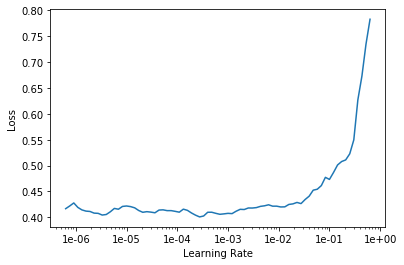

In [76]:
learn.lr_find()
learn.recorder.plot()

In [77]:
learn.save('stage-1')

In [78]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.427052,0.355259,0.811111,00:25
1,0.409237,0.331948,0.866667,00:25


In [79]:
learn.unfreeze()
learn.fit_one_cycle(10, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.384779,0.347938,0.844444,00:25
1,0.390658,0.357054,0.877778,00:25
2,0.391727,0.399126,0.822222,00:25
3,0.395185,0.379979,0.844444,00:25
4,0.394093,0.415706,0.833333,00:25
5,0.392188,0.372799,0.855556,00:25
6,0.382264,0.364648,0.866667,00:26
7,0.376533,0.364430,0.855556,00:25
8,0.369324,0.368361,0.833333,00:25
9,0.364719,0.368263,0.833333,00:25


In [80]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.365176,0.369260,0.855556,00:25
1,0.373728,0.448166,0.800000,00:25
2,0.383572,0.383881,0.855556,00:25
3,0.379083,0.370652,0.855556,00:25
4,0.371029,0.365733,0.855556,00:25


In [81]:
learn.save('stage-2')

In [82]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)
pred_prob, pred_class = preds.max(1)

submission = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':pred_class})

In [83]:
submission.to_csv('titanic-solution-fastai1.csv', index=False)

In [85]:
train.to_csv('Data/train_clear.csv', index=False)
test.to_csv('Data/test_clear.csv', index=False)